In [30]:
%load_ext autoreload
%autoreload 2
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.transforms as transforms
import torchvision.datasets as dset

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pathlib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
from utils.net_helper import *
# from utils.data import *
from utils.trainer import train_loop
import network.networks as gans


In [44]:
from PIL import Image

In [45]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  
device

device(type='cuda', index=0)

### Process images and add to a dataloader

In [55]:
!ls

LICENSE  README.md  data  gans_train.ipynb  network  utils


In [56]:
data = 'data/'

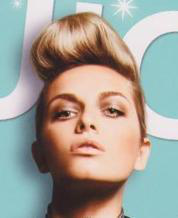

In [57]:
img = Image.open('data/img_align_celeba/000005.jpg')
img

In [58]:
image_size = 64
batch_size = 128

dataset_train = dset.ImageFolder(root=data,
                              transform=transforms.Compose([
                                  transforms.Resize(image_size),
                                  transforms.CenterCrop(image_size),
                                  transforms.ToTensor(),
                                  transforms.Normalize((.5,.5,.5), (.5,.5,.5))
                              ])
                            )

train_loader = torch.utils.data.DataLoader(dataset=dataset_train,
                                          batch_size=batch_size,
                                          shuffle=True)


### Setup networks

In [60]:
discriminator_lr = .0008
generator_lr = .0004

In [61]:
64/2/2/2

8.0

In [64]:
16*2*2

64

In [65]:


discriminator = gans.Gan_Discriminator([64,64,128,128], [3,3,3,3], [2,2,2,1])
discriminator.to(device)
discr_opt = torch.optim.Adam(discriminator.parameters(), lr = discriminator_lr)

criterion = nn.BCELoss()

generator = gans.Gan_Generator((64,16,16), [2,2,1,1], [128,64,64,1], [3,3,3,3], [1,1,1,1])
generator.to(device)
gen_opt = torch.optim.Adam(generator.parameters(), lr=generator_lr)


EPOCH:  1


/opt/conda/lib/python3.7/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


DISCRIMINATOR Training loss:... 0.41445558055356
GENERATOR Training loss:... 3.8987643421010296

Best DLoss :  0.41445558055356 ....OLD :  99999
Best GLoss :  3.8987643421010296 ....OLD :  99999


/opt/conda/lib/python3.7/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([55])) that is different to the input size (torch.Size([55, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


<Figure size 432x288 with 0 Axes>

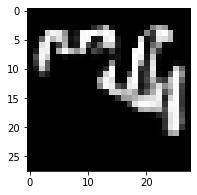


EPOCH:  2
DISCRIMINATOR Training loss:... 0.3528382383440047
GENERATOR Training loss:... 4.180753575078554

Best DLoss :  0.3528382383440047 ....OLD :  0.41445558055356


<Figure size 432x288 with 0 Axes>

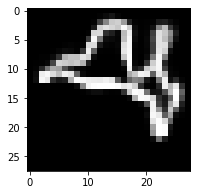


EPOCH:  3
DISCRIMINATOR Training loss:... 0.4360908556757034
GENERATOR Training loss:... 3.5547653372282726

Best GLoss :  3.5547653372282726 ....OLD :  3.8987643421010296


<Figure size 432x288 with 0 Axes>

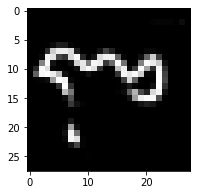


EPOCH:  4
DISCRIMINATOR Training loss:... 0.5411546536798818
GENERATOR Training loss:... 3.3439126297109247

Best GLoss :  3.3439126297109247 ....OLD :  3.5547653372282726


<Figure size 432x288 with 0 Axes>

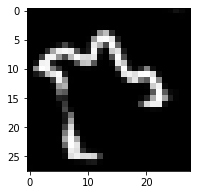


EPOCH:  5
DISCRIMINATOR Training loss:... 0.4993927168323255
GENERATOR Training loss:... 3.371483272469521



<Figure size 432x288 with 0 Axes>

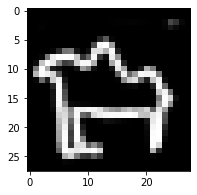

In [9]:
epochs = 5
save_path = 'exp/exp1/'
save_last = True
hist = train_loop(
                train_loader, 
                epochs,
                discriminator, 
                generator,
                discr_opt,
                gen_opt,
                criterion,
                save_path,
                save_last,
                show_img=True
                )    

In [ ]:
# gen_loss_series = pd.Series(hist[1])
# discr_loss_series = pd.Series(hist[0])
# gen_loss_series.plot(label="Generator")
# discr_loss_series.plot(label="Discriminator")
# plt.legend()